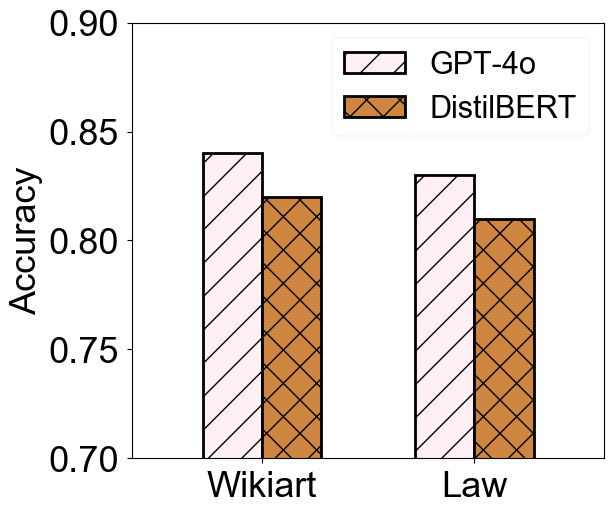

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams["axes.unicode_minus"] = False

# 解决保存 PDF 时字体问题
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# 数据
effect_list = [
    np.array([0.75, 0.842]),  # Wikiart，第一个柱子（方法1） -> 将被删除
    np.array([0.84, 0.844]),  # Wikiart，第二个柱子（方法2）
    np.array([0.82, 0.846]),  # Wikiart，第三个柱子（方法3）
    np.array([0.76, 0.83]),   # Law，第一组柱子（方法1） -> 将被删除
    np.array([0.83, 0.80]),   # Law，第二个柱子（方法2）
    np.array([0.81, 0.79]),   # Law，第三个柱子（方法3）
]

# 颜色和填充样式
colors = [
    [114, 110, 147],
    [255, 240, 245],
    [205, 133, 64]
]
hatches = ['o', '/', 'x']

# **增加分组之间的距离**
group_positions = [0.91, 1.09]  # **调整 Law 组的位置，使两组间隔更大**
bar_width = 0.05  
n_bars = 2  
method = ["DebertaV3", "GPT-4o", "DistilBERT"]

with plt.style.context("seaborn-v0_8-paper"):
    fig, ax = plt.subplots(figsize=(6, 5))

    # 绘制 Wikiart 组（方法2、方法3）
    group_pos = group_positions[0]
    group_left = group_pos - (n_bars - 1) * bar_width / 2  
    for j in range(n_bars):
        ax.bar(group_left + j * bar_width,
               effect_list[j+1][0],
               width=bar_width,
               edgecolor="black",
               linewidth=2,
               color=(colors[j+1][0] / 255., colors[j+1][1] / 255., colors[j+1][2] / 255.),
               hatch=hatches[j+1],
               label=method[j+1])
    
    # 绘制 Law 组（方法2、方法3）
    group_pos = group_positions[1]
    group_left = group_pos - (n_bars - 1) * bar_width / 2  
    for j in range(n_bars):
        ax.bar(group_left + j * bar_width,
               effect_list[j+4][0],
               width=bar_width,
               edgecolor="black",
               linewidth=2,
               color=(colors[j+1][0] / 255., colors[j+1][1] / 255., colors[j+1][2] / 255.),
               hatch=hatches[j+1])
    
    # 设置 y 轴标签和范围
    ax.set_ylabel("Accuracy", fontsize=26, weight='bold')
    ax.set_ylim(0.7, 0.9)
    
    # 设置 x 轴刻度和标签
    ax.set_xticks(group_positions)
    ax.set_xticklabels(["Wikiart", "Law"], fontsize=26, weight='bold')

    # y 轴格式化
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
    ax.set_yticks([0.7, 0.75, 0.8, 0.85, 0.9])
        
    ax.tick_params(axis='x', labelsize=26)
    ax.tick_params(axis='y', labelsize=26)

    # **调整 x 轴范围，使图形更加均衡**
    ax.set_xlim(0.8, 1.2)  # 让左右两边有一些留白空间

    # 添加图例
    ax.legend(fontsize=22)

    fig.tight_layout(pad=0.2)

    plt.show()
    fig.savefig('./exp/exp-exist.pdf', format='pdf', bbox_inches='tight', dpi=300)
